In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from scipy import interpolate
import pickle
from matplotlib.colors import LogNorm

import Functions

In [2]:
Path0 = '/global/homes/l/lianming/data/'
Path1 = '/global/homes/l/lianming/data/Test_Interp'
Path2 = '/global/homes/l/lianming/data/2Day_Interp'

In [3]:
PathInterp = Path2

EventNames = np.load(os.path.join(PathInterp, 'EventName.npy'))
RateDict = {key:1 for key in EventNames}

In [8]:
RateDict

{'AGN': 1,
 'CART': 1,
 'EB': 1,
 'ILOT': 1,
 'KN_B19': 1,
 'KN_K17': 1,
 'MIRA': 1,
 'Mdwarf': 1,
 'PISN': 1,
 'RRL': 1,
 'SLSN-I': 1,
 'SNII-NMF': 1,
 'SNII-Templates': 1,
 'SNIIn': 1,
 'SNIa-91bg': 1,
 'SNIa-SALT2': 1,
 'SNIax': 1,
 'SNIbc-MOSFIT': 1,
 'SNIbc-Templates': 1,
 'TDE': 1,
 'V19_CC+HostXT': 1,
 'uLens-Binary': 1,
 'uLens-Single-GenLens': 1,
 'uLens-Single_PyLIMA': 1}

In [9]:
#Coordinates

CoordinateDict = {}

# CoordinateDict['Bands'] = ['u', 'g', 'r', 'i', 'z', 'Y']
CoordinateDict['Bands'] = ['g', 'i']
CoordinateDict['dT1s'] = np.arange(30, 35, 30)
CoordinateDict['dT2s'] =  np.arange(300, 320, 60)

CoordinateDict['BinMag'] = np.arange(-1.25, 3.84, 0.1)
CoordinateDict['BinColor'] = np.arange(-9.25, 9.8, 0.5)

In [10]:
HashTable = np.zeros([len(CoordinateDict['Bands']), len(CoordinateDict['Bands']), len(CoordinateDict['dT1s']), len(CoordinateDict['dT2s']), 
                      len(CoordinateDict['BinMag'])-1, len(CoordinateDict['BinColor'])-1], dtype='int32')

In [11]:
CoordinateDict['dT1s']

array([30])

In [12]:
HashTable.shape

(2, 2, 1, 1, 50, 38)

In [13]:
EventNames = [ 'SNII-NMF',
              'SNIa-SALT2', 
              'uLens-Binary']

In [14]:
EventNames = [ 'SNIa-SALT2']

In [35]:
time1 = time.time()

dMagRange = [[], []]
ColorRange = [[], []]

for EventName in EventNames:
    
    FilePath = os.path.join(PathInterp, EventName+'_Interp.pkl')
    with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

    for ii, Band1 in enumerate(CoordinateDict['Bands']):
        for jj, Band2 in enumerate(CoordinateDict['Bands']):
            if jj==ii:
                continue
            else:
                for kk, dT1 in enumerate(CoordinateDict['dT1s']):
                    for ll, dT2 in enumerate(CoordinateDict['dT2s']):

                        data = Functions.CalculateMap(Interp_load, TimeRange_load, 
                                     Band1, Band2, dT1, dT2, PointsPDay=12);

                        histdata,_,_ = np.histogram2d(data[0], data[1], bins=[CoordinateDict['BinMag'], CoordinateDict['BinColor']])

                        dMagRange[0].append(data[0].min())
                        dMagRange[1].append(data[0].max())
                        ColorRange[0].append(data[1].min())
                        ColorRange[1].append(data[1].max())
                        
                        outliersNo = len(data[0]) - np.sum(histdata)
                        if outliersNo != 0:
                            print('{:.0f} outliers found!'.format(outliersNo), end='')

#                         HashTable[ii, jj, kk, ll] = histdata*RateDict[EventName] + HashTable[ii, jj, kk, ll]
                        HashTable[ii, jj, kk, ll] = histdata + HashTable[ii, jj, kk, ll]


                        print('|', end='')
                    
        print('')
            
print('Finish!')

print( 'The range of dMag is [{}, {}].'.format( min(dMagRange[0]), max(dMagRange[1])) ) 
print( 'The range of Color is [{}, {}].'.format( min(ColorRange[0]), max(ColorRange[1])) )

print( '{} min spent.'.format( (time.time() - time1)/60 ))

||
||
Finish!
The range of dMag is [-0.034088492393891556, 1.5270173549829877].
The range of Color is [-7.604756255950367, 7.66248983173152].
7.473694241046905 min spent.


In [170]:
with open('ProbabilityCube_SNIa_1Slice0.1.pkl', 'wb') as f:
    pickle.dump(EventNames, f)
    pickle.dump(CoordinateDict, f)
    pickle.dump(HashTable, f ) 

In [36]:
len(dMagRange[0])

900

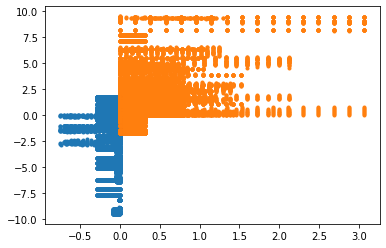

In [74]:
plt.plot(dMagRange[0], ColorRange[0], '.', dMagRange[1], ColorRange[1], '.')

In [66]:
print( 'The range of dMag is [{}, {}].'.format( min(dMagRange[0]), max(dMagRange[1])) ) 
print( 'The range of Color is [{}, {}].'.format( min(ColorRange[0]), max(ColorRange[1])) )

The range of dMag is [-0.14117995898093127, 0.3533891836843317].
The range of Color is [-8.942305388341218, 8.931305717655285].


In [64]:
min(dMagRange[0])

-0.14117995898093127

In [4]:
FilePath = '/global/homes/l/lianming/data/2Day_Interp/SNIa-SALT2_Interp.pkl'

In [5]:
with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

In [6]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=0.1);

11.4 s ± 366 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1);

35.1 s ± 793 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=3);

1min 2s ± 736 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=6);

1min 46s ± 2.92 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1);

35.3 s ± 893 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=3);

1min 11s ± 6.14 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
%timeit data = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=6);

1min 57s ± 11.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [52]:
%timeit data = Functions.CalculateMap1(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=1);

48.4 s ± 686 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%timeit data = Functions.CalculateMap1(Interp_load, TimeRange_load, 'g', 'i', 30, 300, PointsPDay=12);

6min 56s ± 14.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
with open('/global/homes/l/lianming/data/Test_Interp/KN_B19_Interp.pkl', 'rb') as f:
    Interp = pickle.load(f)
    Time = pickle.load(f)

In [38]:
min(dMagRange[0])

-1.313423008342653

In [134]:
with open('/global/homes/l/lianming/ProbabilityCube_Sep20_15:15_SNIa-SALT2', 'rb') as f:
    EventNames = pickle.load(f)
    InfoDict = pickle.load(f)
    HashTable = pickle.load(f)

In [135]:
InfoDict

{'EventNames': ['SNIa-SALT2'],
 'Bands': ['g', 'i'],
 'dT1s': array([120]),
 'dT2s': array([0]),
 'BinMag': array([-1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65, -0.55, -0.45,
        -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,  0.45,
         0.55,  0.65,  0.75,  0.85,  0.95,  1.05,  1.15,  1.25,  1.35,
         1.45,  1.55,  1.65,  1.75,  1.85,  1.95,  2.05,  2.15,  2.25,
         2.35,  2.45,  2.55,  2.65,  2.75,  2.85,  2.95,  3.05,  3.15,
         3.25,  3.35,  3.45,  3.55,  3.65,  3.75]),
 'BinColor': array([-9.25, -8.75, -8.25, -7.75, -7.25, -6.75, -6.25, -5.75, -5.25,
        -4.75, -4.25, -3.75, -3.25, -2.75, -2.25, -1.75, -1.25, -0.75,
        -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
         4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25,
         8.75,  9.25,  9.75])}

In [136]:
HashTable.shape

(2, 2, 1, 1, 50, 38)

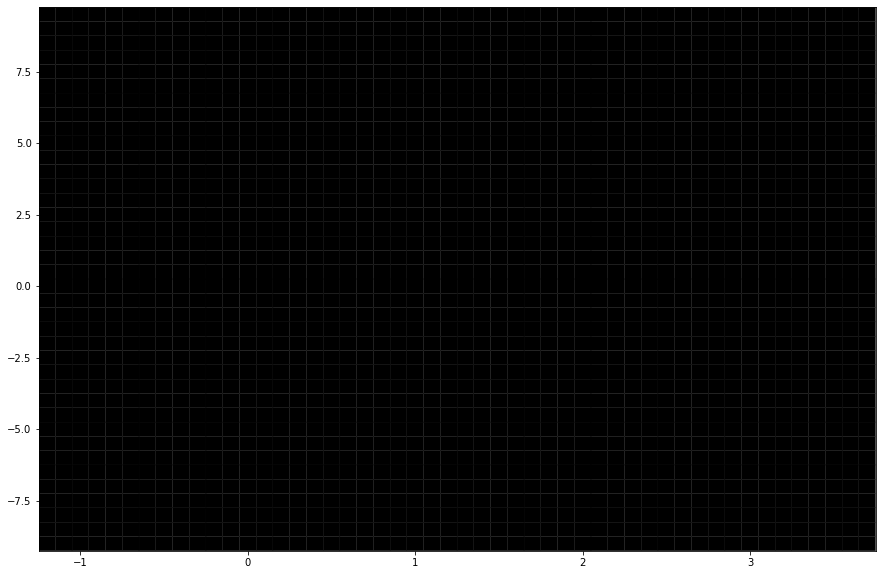

In [138]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

Map = Enquiry(HashTable, InfoDict, 'i', 'i', 120, 0)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
# plt.xlim([-0.5, 2.5])
# plt.ylim([-7.5, 4])
# plt.axis('equal')

# plt.legend()

In [123]:
Map

In [125]:
Map = Enquiry(HashTable, InfoDict, 'g', 'i', 60, 450)

The value of dT1 is out of boundary, the available interval is [120.00, 120.00).


In [131]:
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):

    Ind1 = InfoDict['Bands'].index(Band1)
    Ind2 = InfoDict['Bands'].index(Band2)

    if dT1<InfoDict['dT1s'][0] or dT1>InfoDict['dT1s'][-1]:
        raise ValueError('The value of dT1 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT1s'][0], InfoDict['dT1s'][-1]))
        
    else:
        Ind3 = np.where( dT1 >= InfoDict['dT1s'] )[0][-1]

    if dT2<InfoDict['dT2s'][0] or dT2>InfoDict['dT2s'][-1]:
        raise ValueError('The value of dT2 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT2s'][0], InfoDict['dT2s'][-1]))
    else:
        Ind4 = np.where( dT2 >= InfoDict['dT2s'] )[0][-1]

    Results = HashTable[Ind1, Ind2, Ind3, Ind4]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))
        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results